<a href="https://colab.research.google.com/github/mohd-faizy/03_TensorFlow_In-Practice/blob/master/02_Computer__Vision_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Beyond Hello World, A Computer Vision Example__
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## __Start Coding__

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

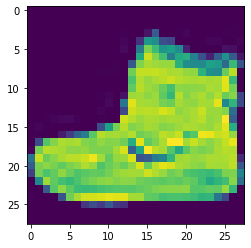

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**Normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [5]:
# Normalizing
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [6]:
# Designing Model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [7]:
# Training
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5011 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3342 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3110 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8920


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [8]:
# Testing
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8761


[0.3438737690448761, 0.8761000037193298]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


# __Exploration Exercises__

## __Exercise 1:__
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[4.6662403e-06 4.1319606e-09 8.2938854e-08 7.9478246e-09 1.4538463e-07 6.8625915e-03 7.4735073e-07 1.2043373e-02 1.2795728e-05 9.8107564e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [10]:
print(test_labels[0])

9


### __Question 1. What does this list represent?__


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


####__Answer:__ 
The correct answer is (3)  : __It's the probability that this item is each of the 10 classes__



The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

### __Question 2. How do you know that this list tells you that the item is an ankle boot?__


1.   There's not enough information to answer that question
2.   The 10th element (i.e at Index 9) on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


#### __Answer__
The correct answer is (2).__The 10th element (i.e at Index 9) on the list is the biggest, and the ankle boot is labelled 9.__


Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

In [11]:
list_n = [3.75066411e-05, 7.47042694e-09, 8.80712548e-07, 1.40814862e-07, 1.04817502e-07, 1.86433624e-02, 7.82703228e-06, 1.14689514e-01, 3.13434575e-04, 8.66307259e-01]

print("Number is", max(list_n), "index at position", list_n.index(max(list_n)))

Number is 0.866307259 index at position 9


In [12]:
from decimal import Decimal

'%.8E' % Decimal('0.866307259')

'8.66307259E-01'

__Labels__
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## __Exercise 2:__ 
Let's now look at the layers in your model. Experiment with different values for the dense layer with __512 neurons__. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [13]:
# Code_1
# importing the library
import tensorflow as tf
print(tf.__version__)

# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Normalizing
training_images = training_images/255.0
test_images = test_images/255.0

# Model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# Train
model.fit(training_images, training_labels, epochs=5)

# Test
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1840
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0752
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0467
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0348
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0728
[3.5416246e-11 1.7646523e-10 4.0190945e-10 4.4379988e-08 1.0160743e-13 1.3235062e-12 2.6342558e-16 1.0000000e+00 7.3461864e-10 4.4307313e-09]
7


In [14]:
# Code_2
# importing the library
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Normalizing
training_images = training_images/255.0
test_images = test_images/255.0

# Model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

# Train
model.fit(training_images, training_labels, epochs=5)

# Test
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])




2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1843
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0752
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0499
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0350
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0673
[1.2601662e-11 3.0978260e-09 9.3748227e-08 1.4722957e-06 6.6160695e-16 5.0453086e-10 7.5184720e-15 9.9999845e-01 9.3678292e-09 2.2654771e-08]
7


### __Question 1. Increase to 1024 Neurons -- What's the impact?__

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


#### __Answer__
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

## __Exercise 3:__ 

__Question: 
What would happen if you remove the Flatten() layer. Why do you think that's the case?__ 

__Answer:__
You get an error about the __shape of the data__. It may seem vague right now, but it reinforces __the rule of thumb__ that the __first layer in your network should be the same shape as your data.__

- Right now our data is __28x28 images__, and __28 layers of 28 neurons would be infeasible__.

- So it makes more sense to 'flatten' that 28, 28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the `Flatten()` layer at the begining, and when the arrays are loaded into the model later, they'll __automatically be flattened for us.__


__Error__
```
ValueError: Shape mismatch: The shape of labels (received (32, 1))
should equal the shape of logits except for the last dimension (received (32, 28, 10)).
```



## __Exercise 4:__ 

__Qusetion:__  Consider the _final (output) layers_. Why are there 10 of them? __What would happen if you had a different amount than 10? For example, try training the network with 5?__

__Answer:__ You get an error as soon as it finds an `unexpected value`. 

- Another __rule of thumb__ -- the number of neurons in the last layer __should match the number of classes you are classifying for__.
- In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])# Final Output Layer 

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: nan
[nan nan nan nan nan]
7


## __Exercise 5:__ 

__Qusetion:__ Consider the __effects of additional layers__ in the network. What will happen _if you add another layer between the one with 512 and the final layer with 10_. 

__Answer:__ There isn't a significant impact -- because this is __relatively simple data.__ For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [16]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1867
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0800
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.0682
[1.4110552e-08 1.5309735e-06 6.8298499e-07 5.2591317e-06 6.4594436e-09 7.7814928e-09 7.0619302e-11 9.9998915e-01 1.2704743e-07 3.1834031e-06]
7


## __Exercise 6:__ 

Consider the impact of training for __more or less epochs.__ Why do you think that would be the case? 

> Try __15 epochs__ -- you'll probably get a model with a much better loss than the one with 5

> Try __30 epochs__ -- you might see _the loss value stops decreasing, and sometimes increases._ This is a side effect of something called '__OVERFITTING__' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.2.0
Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2610
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1144
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0786
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0589
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0461
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0351
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0232
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0193
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0151
Epoch 11/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0137
Epoch 12/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.

## __Exercise 7:__ 
 
Before you trained, you __Normalized__ the data, going from values that were __0-255 to values that were 0-1__.

> What would be the impact of removing __Normalization__ ? Here's the complete code to give it a try. Why do you think you get different results? 

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.6791
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3423
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3013
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2798
[6.3300701e-20 4.1192121e-20 1.6550614e-10 1.1449106e-07 2.7273233e-26 2.7344093e-17 0.0000000e+00 9.9999988e-01 8.4162813e-24 8.2003822e-12]
7


- [__Why Data should be Normalized before Training a Neural Network__](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d)

  -  __Normalizing__ the data generally __speeds up learning__ and __leads to faster convergence.__

- [__Why do we have to normalize the input for an artificial neural network?__](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network) 

__There are 2 Reasons why we have to Normalize Input Features before Feeding them to Neural Network:__

- __Reason 1:__ If a `Feature` in the `Dataset` is big in scale compared to others -then this big scaled feature becomes - and as a result of that, __Predictions of the Neural Network will not be Accurate.__

 - __Example:__ In case of __Employee Data__, if we consider __Age__ and __Salary__, Age will be a __Two Digit Number__ while Salary can be __7 or 8 Digit (1 Million, etc..)__. In that Case, _Salary will Dominate the Prediction of the Neural Network._ __But if we Normalize those Features, Values of both the Features will lie in the Range from (0 to 1).__

- __Reason 2:__ Front Propagation of Neural Networks involves the __Dot Product__ of __Weights__ with __Input Features__. So, if the Values are very high (for Image and Non-Image Data), Calculation of Output takes a _lot of Computation Time as well as Memory._ Same is the case during Back Propagation. Consequently, Model Converges slowly, if the Inputs are not Normalized.

 - __Example:__ If we perform Image Classification, Size of Image will be very huge, as the Value of each Pixel ranges from 0 to 255. __Normalization in this case is very important.__

Mentioned below are the instances where Normalization is very important:

- **K-Means**
- **K-Nearest-Neighbours**
- **Principal Component Analysis (PCA)**
- **Gradient Descent**



```
# With Normalization
2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2016
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0807
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0530
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0362
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0285
313/313 [==============================] - 0s 2ms/step - loss: 0.0671


[3.3770969e-11 5.2681887e-10 1.0469805e-07 5.4226810e-05 4.8419125e-13 
2.2947304e-09 2.3805056e-16 9.9994290e-01 1.4010339e-10 2.7823589e-06]

7
```
```
# Without Normalization

2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8113
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3326
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3008
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2707
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2409
313/313 [==============================] - 0s 1ms/step - loss: 0.2965

[5.1238179e-22 3.6102078e-12 2.1334425e-10 1.8252521e-09 6.5543584e-16 
7.2200566e-17 5.7560969e-37 1.0000000e+00 2.0545000e-21 9.7670383e-10]

7
```


## __Exercise 8:__ 

Earlier when you trained for extra epochs you had an issue where your loss might change. 

It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....

__So how would you fix that?__ Like any other program...you have $\color{red}{\textbf{callbacks!}}$ Let's see them in action...

In [19]:
import tensorflow as tf
print(tf.__version__)

# Class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
# Object of Class
callbacks = myCallback()

# Dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalization
training_images=training_images/255.0
test_images=test_images/255.0

# Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Training
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4796
Epoch 2/5
1853/1875 [============================>.] - ETA: 0s - loss: 0.3598
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3591


In [20]:
# Changing the working directory
import os
os.chdir('/content/sample_data')

In [21]:
pip install livelossplot

## __Check The below model for OverFitting__

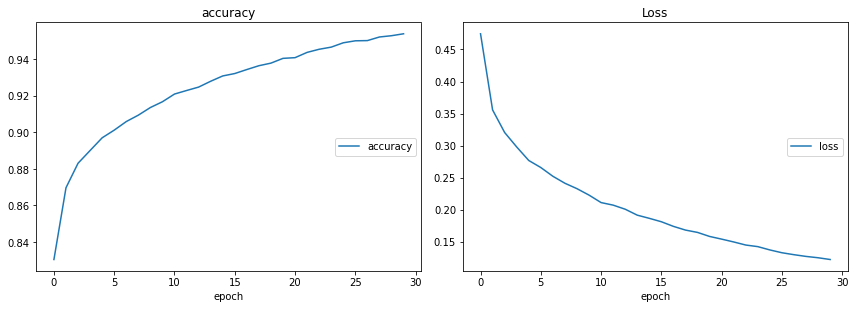

accuracy
	accuracy         	 (min:    0.831, max:    0.954, cur:    0.954)
Loss
	loss             	 (min:    0.122, max:    0.475, cur:    0.122)

Epoch 00030: saving model to model_weights.h5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9537 - lr: 0.0010


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.inputs.tf_keras import PlotLossesCallback
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Creating the checkpoints i.e Saving the weights with maximum Validation accuracy
checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor = 'val_accuracy',
                             save_weights_only = True,
                             mode = 'max',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              min_lr = 0.00001,
                              model = 'auto')


my_callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

model.fit(training_images, training_labels, epochs=30, callbacks=my_callbacks)


In [23]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.8845
[4.05125987e-24 8.86135935e-25 4.59824971e-24 4.14646987e-28 1.03771696e-27 9.05495789e-10 3.89395475e-21 1.57787895e-07 1.05916975e-19 9.99999881e-01]
9
